<a href="https://colab.research.google.com/github/BigDataTeam22/PawsomeConciergeCaregiverSelection/blob/main/PawsomeCaregiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PAWSOME CONCIERGE - CAREGIVER SELECTION


In [1]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.svm import SVC
import time
import matplotlib.pyplot as plt

### Data preprocessing
First we read from the csv file, then we calculate the age and replace Birth_date with it.


In [2]:
# Read the DataFrame from CSV
df = pd.read_csv('dataset.csv')
df2=df

column_name='birth_date'
#Calculate age
df[column_name] = pd.to_datetime(df[column_name])
current_date = datetime.now()
df['Age'] = current_date.year - df[column_name].dt.year
df.loc[df[column_name].dt.month > current_date.month, 'Age'] -= 1

# Replace Birth_date with age
birth_date_index = df.columns.get_loc(column_name)
df.insert(birth_date_index, 'Age', df.pop('Age'))
df.drop(column_name, axis=1, inplace=True)

df.drop('age', axis=1, inplace=True)

We then apply label encoding to each column and impute missing values with a mean strategy.

- fear_discomfort_management - string(100)
- pet_discipline_approach - string(100)
- dogwalking_tool_choice - string(100)
- dog_reaction_management - string(100)
- dog_reaction_resolution - string(100)
- cat_litter_box_issue_cause - string(100)
- cat_toy_string_chewing_prevention - string(100)
- cat_injury_handling - string(100)
- cat_furniture_scratching_solution - string(100)
- puppy_curiosity_management - string(100)
- Age - int
- experience_with_dog - string(100)
- experience_with_cat - string(100)
- province - string(100)
- class - string(100)

In [3]:
# Define categorical columns
categorical_columns = list(df)

# Apply label encoding to each column
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

print("Number of rows in data frame: ",len(df.index))
df.sample(n=5)

Number of rows in data frame:  1048576


,fear_discomfort_management,pet_discipline_approach,dogwalking_tool_choice,dog_reaction_management,dog_reaction_resolution,cat_litter_box_issue_cause,cat_toy_string_chewing_prevention,cat_injury_handling,cat_furniture_scratching_solution,puppy_curiosity_management,Age,experience_with_dog,experience_with_cat,province,class
95877,0,1,1,3,1,2,2,0,1,1,12,2,0,0,0
500618,1,3,2,2,0,3,2,0,2,2,16,1,1,1,2
694910,2,2,2,1,2,2,1,3,3,2,29,2,1,1,0
804961,3,0,1,0,2,0,1,2,0,1,28,1,0,0,0
367311,1,1,2,1,2,2,3,0,3,3,27,1,2,1,0


We split the data into training 80% and testing 20% sets

In [4]:
classname='class'

y = df[classname]
X = df.drop(classname, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### k-Nearest Neighbors classifier

In [5]:
%%time
# Initialize the kNN classifier
k = 5 #number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn_classifier.fit(X_train, y_train)

CPU times: user 4.99 s, sys: 47.4 ms, total: 5.03 s
Wall time: 5.12 s


KNeighborsClassifier()

In [6]:
%%time
# Make predictions on the test data
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracy
knnaccuracy = accuracy_score(y_test, knn_predictions)

print("Accuracy:", knnaccuracy)

Accuracy: 0.8938993686700109
CPU times: user 7min 7s, sys: 906 ms, total: 7min 8s
Wall time: 7min 15s


In [7]:
# Generate confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

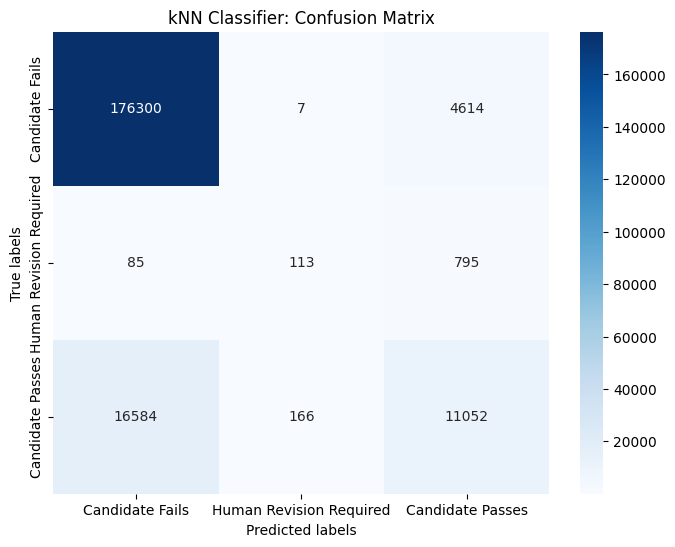

In [8]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"],yticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('kNN Classifier: Confusion Matrix')
plt.show()

### SVM Classifier

In [ ]:
%%time
# Create SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

In [ ]:
%%time
# Make predictions on the testing set
predictions = svm_classifier.predict(X_test)

# Calculate accuracy
SVMaccuracy = accuracy_score(y_test, predictions)
print("Accuracy:", SVMaccuracy)

In [ ]:
# Generate confusion matrix
SVM_conf_matrix = confusion_matrix(y_test, knn_predictions)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"],yticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Classifier: Confusion Matrix')
plt.show()

### Clustering and Association Mining Rule

In [ ]:
%%time
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='o', label='Centroids')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('KMeans Clustering')
plt.legend()
plt.show()